In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as smm
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [2]:
X = pd.read_csv("CO2Data.csv",skiprows = 57,names = ["Yr","Mn","Date","Date2","CO2","Seasonal_adj","Fit","Seasonal_adj_Fit","CO2Filled","Seasonal_Adj_Filled"])
X

,Yr,Mn,Date,Date2,CO2,Seasonal_adj,Fit,Seasonal_adj_Fit,CO2Filled,Seasonal_Adj_Filled
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.69,314.42,316.17,314.90,315.69,314.42
3,1958,4,21290,1958.2877,317.45,315.15,317.28,314.98,317.45,315.15
4,1958,5,21320,1958.3699,317.50,314.74,317.83,315.06,317.50,314.74
5,1958,6,21351,1958.4548,-99.99,-99.99,317.24,315.14,317.24,315.14
6,1958,7,21381,1958.5370,315.86,315.17,315.90,315.21,315.86,315.17
7,1958,8,21412,1958.6219,314.93,316.16,314.05,315.29,314.93,316.16
8,1958,9,21443,1958.7068,313.21,316.06,312.50,315.35,313.21,316.06
9,1958,10,21473,1958.7890,-99.99,-99.99,312.44,315.41,312.44,315.41


In [3]:
CO2 = X['CO2']
Yr = X['Yr']

(300, 450.0)

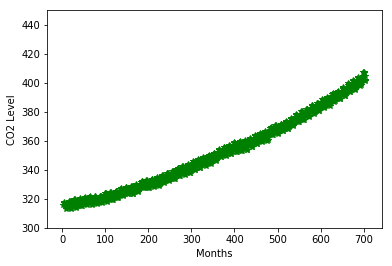

In [4]:
plt.plot(range(0,len(CO2)),CO2,'g*') 
plt.xlabel('Months')
plt.ylabel('CO2 Level')
plt.ylim(top=450)
plt.ylim(bottom=300)



In [11]:
Mn_Length = list(range(0,len(CO2)))
Mn_Length = smm.add_constant(Mn_Length)
model = smm.OLS(CO2,Mn_Length)
print(Mn_Length)
results = model.fit()
results.params
results.summary()


[[  1.   0.]
 [  1.   1.]
 [  1.   2.]
 ...
 [  1. 705.]
 [  1. 706.]
 [  1. 707.]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     216.2
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           6.92e-43
Time:                        19:59:35   Log-Likelihood:                -3799.7
No. Observations:                 708   AIC:                             7603.
Df Residuals:                     706   BIC:                             7613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        296.0171      3.897     75.964      0.000     288.366     303.668
x1             0.1403      0.010     14.703      0.000       0.122       0.159
==============================================================================
Omnibus:                     1023.219   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143139.066
Skew:                          -8.262   Prob(JB):                         0.00
Kurtosis:                      70.669   Cond. No.                         816.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
CO2_NOoutliner = []
for i in CO2:
    if i >= 0:
        CO2_NOoutliner.append(i)
CO2_NOoutliner
        

[315.69,
 317.45,
 317.5,
 315.86,
 314.93,
 313.21,
 313.33,
 314.67,
 315.62,
 316.38,
 316.71,
 317.72,
 318.29,
 318.15,
 316.54,
 314.8,
 313.84,
 313.26,
 314.8,
 315.58,
 316.43,
 316.97,
 317.58,
 319.02,
 320.03,
 319.59,
 318.18,
 315.9,
 314.17,
 313.83,
 315.0,
 316.19,
 316.93,
 317.7,
 318.54,
 319.48,
 320.58,
 319.77,
 318.57,
 316.79,
 314.81,
 315.38,
 316.1,
 317.01,
 317.94,
 318.55,
 319.68,
 320.63,
 321.01,
 320.55,
 319.57,
 317.4,
 316.25,
 315.42,
 316.69,
 317.7,
 318.74,
 319.07,
 319.86,
 321.39,
 322.25,
 321.48,
 319.74,
 317.77,
 316.21,
 315.99,
 317.12,
 318.31,
 319.57,
 322.26,
 321.89,
 320.44,
 318.69,
 316.71,
 316.79,
 317.79,
 318.71,
 319.44,
 320.44,
 320.89,
 322.14,
 322.16,
 321.87,
 321.39,
 318.81,
 317.82,
 317.3,
 318.87,
 319.42,
 320.62,
 321.59,
 322.39,
 323.87,
 324.01,
 323.75,
 322.39,
 320.36,
 318.64,
 318.1,
 319.78,
 321.08,
 322.06,
 322.5,
 323.04,
 324.42,
 325.0,
 324.09,
 322.55,
 320.92,
 319.32,
 319.31,
 320.72,
 321.

(300, 450.0)

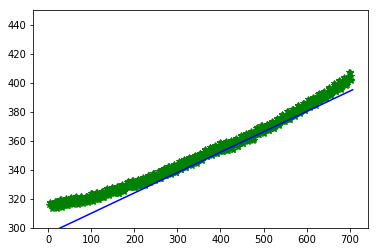

In [9]:
plt.plot(range(0,len(CO2)),CO2,'g*') 
plt.plot(Mn_Length, 296.0171 + 0.1403 * Mn_Length, 'b-')
plt.ylim(top=450)
plt.ylim(bottom=300)

After taking out the outliners in column 5:

In [12]:
#Take out the outliner and re-do the regression
Mn_Length = list(range(0,len(CO2_NOoutliner)))
Mn_Length = smm.add_constant(Mn_Length)
model = smm.OLS(CO2_NOoutliner,Mn_Length)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.142e+04
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:04:43   Log-Likelihood:                -1925.7
No. Observations:                 698   AIC:                             3855.
Df Residuals:                     696   BIC:                             3864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        307.6219      0.289   1063.749      0.000     307.054     308.190
x1             0.1273      0.001    177.270      0.000       0.126       0.129
==============================================================================
Omnibus:                       26.437   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.548
Skew:                           0.485   Prob(JB):                     6.32e-07
Kurtosis:                       2.795   Cond. No.                         804.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

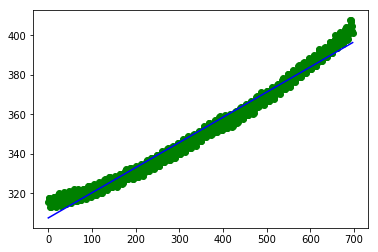

In [14]:
plt.plot(range(0,len(CO2_NOoutliner)),CO2_NOoutliner,'go') 
plt.plot(Mn_Length, 307.6219 + 0.1273 * Mn_Length, 'b-')

In [25]:
t = list(range(0,len(CO2_NOoutliner)))
y = [307.6219 + 0.1273* el for el in t]
resid = [x1 - x2 for (x1, x2) in zip(CO2_NOoutliner,y)]
resid

[8.068100000000015,
 9.700800000000015,
 9.623500000000035,
 7.856200000000058,
 6.798900000000003,
 4.951599999999985,
 4.944299999999998,
 6.157000000000039,
 6.979700000000037,
 7.6124000000000365,
 7.815099999999973,
 8.69780000000003,
 9.140500000000031,
 8.873199999999997,
 7.135900000000049,
 5.268600000000049,
 4.181299999999965,
 3.4739999999999895,
 4.886700000000019,
 5.5394000000000005,
 6.262100000000032,
 6.674800000000062,
 7.157500000000027,
 8.470199999999977,
 9.352899999999977,
 8.785599999999988,
 7.248300000000029,
 4.841000000000008,
 2.9837000000000558,
 2.516399999999976,
 3.559100000000001,
 4.6218000000000075,
 5.2345000000000255,
 5.877200000000016,
 6.589900000000057,
 7.402600000000064,
 8.375299999999982,
 7.437999999999988,
 6.1107000000000085,
 4.203400000000045,
 2.0961000000000354,
 2.5388000000000375,
 3.131500000000017,
 3.914199999999994,
 4.71690000000001,
 5.199600000000032,
 6.202300000000037,
 7.025000000000034,
 7.277699999999982,
 6.6904000000

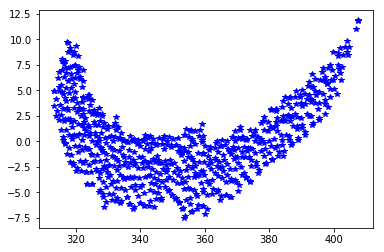

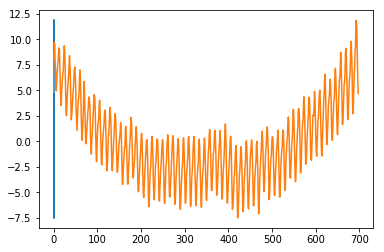

In [27]:
plt.plot(CO2_NOoutliner,resid,'b*')
plt.show()
plt.plot(Mn_Length,resid)
plt.show()

 (a) Fit the data to a linear model F1(t) ∼ α1 + α2t. Plot the data and the fit. What are the values of αˆ1 and αˆ2? Plot the residual error. Comment.

 α1(intercept): 307.6219
 α2  = 0.1273 
 
 The linear regression fit seems pretty good by eyes, however, the residual plot shows a U-Shaped pattern that implies non-random residuals, which is an indicator to try other non-linear models. 
 
 **NONstationary --trend
 http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#nonlinear-header

b) Fit the data to a quadratic model F2(t) ∼ β1 + β2t + β3t2. Plot the data and the fit. What are the values of βˆ1, βˆ2 and βˆ3? Plot the residual error. Comment.


In [19]:
# range(0,len(CO2_NOoutliner)),CO2_NOoutliner
 
# quadmodel = make_pipeline(PolynomialFeatures(2), LinearRegression())
 
# quadmodel.fit(range(0,len(CO2_NOoutliner)), CO2_NOoutliner).predict(1)

 
z = np.polyfit(range(0,len(CO2_NOoutliner)), CO2_NOoutliner,2)
print(z)

#y = β1 + β2*t + β3*t^2

β3, β2, β1 = z
print(β3, β2,β1)

[8.58498708e-05 6.75086292e-02 3.14563005e+02]
8.584987081578733e-05 0.06750862921965672 314.5630049506429


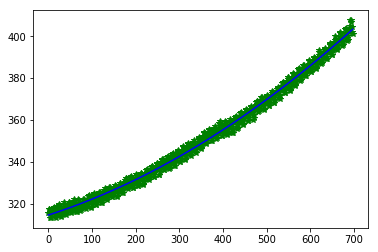

In [20]:
plt.plot(range(0,len(CO2_NOoutliner)),CO2_NOoutliner,'g*') 
plt.plot(Mn_Length, β1 + β2 * Mn_Length + β3* (Mn_Length**2) , 'b-')

In [22]:
t = list(range(0,len(CO2_NOoutliner)))
y2 = [β1 + β2 * el + β3* (el**2) for el in t]
resid2 = [x1 - x2 for (x1, x2) in zip(CO2_NOoutliner,y2)]
resid2

[1.126995049357106,
 2.819400570266623,
 2.801634391434561,
 1.093696512860788,
 0.09558693454545164,
 -1.6926943435115618,
 -1.6411473213102,
 -0.3697719988504673,
 0.5114316238676224,
 1.2024635468441147,
 1.4633237700789437,
 2.4040122935721797,
 2.9045291173238184,
 2.6948742413337072,
 1.015047665602026,
 -0.7949506098712504,
 -1.8251205850862675,
 -2.475462260042832,
 -1.0059756347410485,
 -0.2966607091808555,
 0.48248251663767405,
 0.9514540427145448,
 1.490253869049809,
 2.8588819956434577,
 3.797338422495386,
 3.28562314960584,
 1.803736176974553,
 -0.5483224953983381,
 -2.3505528675128744,
 -2.762954939369024,
 -1.6655287109667825,
 -0.5482741823062156,
 0.11880864661276291,
 0.8157197757900576,
 1.5824592052257458,
 2.4490269349198,
 3.475422964872223,
 2.5916472950829643,
 1.3176999255521196,
 -0.536419143720309,
 -2.5907099127344395,
 -2.0951723814901584,
 -1.4498065499874997,
 -0.6146124182264998,
 0.24041001379282534,
 0.7752607460706145,
 1.8299397786067289,
 2.70444711

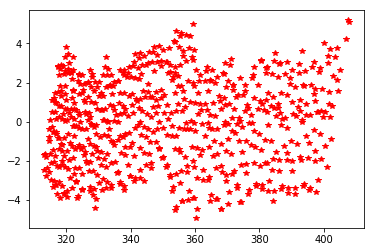

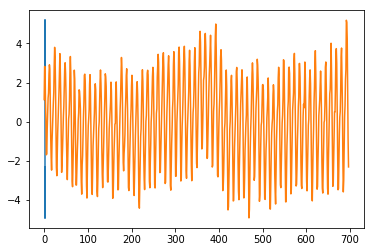

In [28]:
plt.plot(CO2_NOoutliner,resid2,'r*')
plt.show()
plt.plot(Mn_Length,resid2)
plt.show()

In [29]:
from pandas import Series
from matplotlib import pyplot


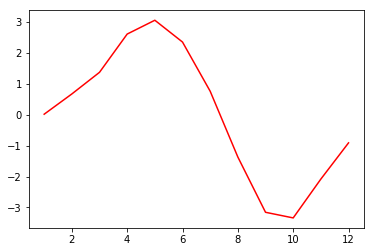

In [30]:
Mon_NoOutlier = X.loc[X['CO2'] >= 0, 'Mn']
Mon_NoOutlier.astype(int)
Mon_NoOutlier

len(resid2)
mat = np.column_stack((Mon_NoOutlier,resid2))
matt = pd.DataFrame(data=mat,index=np.arange(1, 699),columns=np.arange(1, 3))
matt.columns = matt.columns.astype(str)
matt.columns.map(type)
matt1 = matt.rename(index=str, columns={"1": "month", "2": "error"})
matt1

# matt1.sort_values(by="month")
# list(matt.columns.values)
average = []
for i in range(13):
    mon = matt1[matt1.month == i]
    avg = mon.loc[:,"error"].mean()
    average.append(avg)

average_df = pd.DataFrame(average)
average_df
plt.plot(average,'r')


# average_df = pd.DataFrame(average)
# average.drop([1])
# average

# jan = matt.column('month') == 2

# cols = matt.columns
# matt[1] = (matt[cols] == '1').astype(int).sum(axis=1)
# matt[2] = (matt[cols] == '2').astype(int).sum(axis=1)
# matt.columns = ['month', 'error']  
# matt.dtype

# 
# jan
# 
# matt
# resid2_df = pd.DataFrame(resid2)
# mean_list=[]
# for i in range(12):
#     mean1 = resid2_df.iloc[i::12, :]
#     mean_value = mean1.mean()
#     mean_list.append(mean_value)
# print(mean_list)
# plt.plot(mean_list)

# for i in range(11) : 
#     value = resid2_series.iloc[i::12, :]
#     value.groupby(level='key2').sum()
#     print(value)
# df2 = df[df.index % 3 == 0] 
# resample = resid2_series.resample('M')
# monthly_mean = resample.mean()
# print(monthly_mean.head(13))
# monthly_mean.plot()
# pyplot.show()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html 
    

In [32]:
print(average)

[nan, 0.015398606777453017, 0.6700658142486284, 1.3698453492259213, 2.6066195290399046, 3.053339744521321, 2.3482222743416523, 0.7574934104432928, -1.3693971890796197, -3.1554425391916325, -3.3374796460607397, -2.081350996493163, -0.9109937932629033]


In [33]:
print(CO2_NOoutliner)

[315.69, 317.45, 317.5, 315.86, 314.93, 313.21, 313.33, 314.67, 315.62, 316.38, 316.71, 317.72, 318.29, 318.15, 316.54, 314.8, 313.84, 313.26, 314.8, 315.58, 316.43, 316.97, 317.58, 319.02, 320.03, 319.59, 318.18, 315.9, 314.17, 313.83, 315.0, 316.19, 316.93, 317.7, 318.54, 319.48, 320.58, 319.77, 318.57, 316.79, 314.81, 315.38, 316.1, 317.01, 317.94, 318.55, 319.68, 320.63, 321.01, 320.55, 319.57, 317.4, 316.25, 315.42, 316.69, 317.7, 318.74, 319.07, 319.86, 321.39, 322.25, 321.48, 319.74, 317.77, 316.21, 315.99, 317.12, 318.31, 319.57, 322.26, 321.89, 320.44, 318.69, 316.71, 316.79, 317.79, 318.71, 319.44, 320.44, 320.89, 322.14, 322.16, 321.87, 321.39, 318.81, 317.82, 317.3, 318.87, 319.42, 320.62, 321.59, 322.39, 323.87, 324.01, 323.75, 322.39, 320.36, 318.64, 318.1, 319.78, 321.08, 322.06, 322.5, 323.04, 324.42, 325.0, 324.09, 322.55, 320.92, 319.32, 319.31, 320.72, 321.96, 322.57, 323.14, 323.89, 325.02, 325.57, 325.36, 324.14, 322.03, 320.42, 320.25, 321.31, 322.84, 324.0, 324.4

In [34]:
print(type(CO2_NOoutliner))
print(type(average))


<class 'list'>
<class 'list'>


In [35]:
print(len(average))

13


In [36]:
av = average[1:]
print(av)

[0.015398606777453017, 0.6700658142486284, 1.3698453492259213, 2.6066195290399046, 3.053339744521321, 2.3482222743416523, 0.7574934104432928, -1.3693971890796197, -3.1554425391916325, -3.3374796460607397, -2.081350996493163, -0.9109937932629033]


In [37]:
print(len(CO2_NOoutliner))

698


In [39]:
a=av*58

In [40]:
print(len(a))

696


In [41]:
a = a + a[0:2]
print(len(a))

698


In [44]:
from numpy import matrix
sea = np.array(a)
cot = np.array(CO2_NOoutliner)


In [45]:
print(sea.shape)
print(cot.shape)

(698,)
(698,)


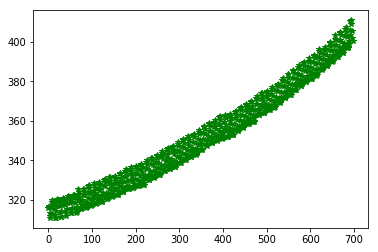

In [46]:
daf = cot - sea
plt.plot(range(0,len(CO2_NOoutliner)),daf,'g*')

In [47]:
resid2 = [x1 - x2 for (x1, x2) in zip(cot,daf)]

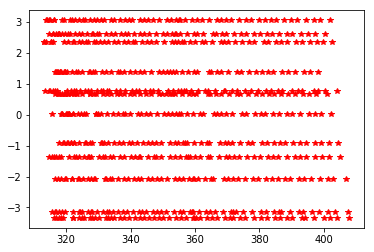

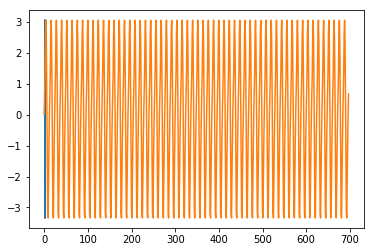

In [48]:
plt.plot(cot,resid2,'r*')
plt.show()
plt.plot(Mn_Length,resid2)
plt.show()